## baseline paper




In [1]:
# install the following using powershell (make sure you have write/read access and then restart notebook)

# python -m pip install cite2c
# python -m cite2c.install
# pip install TableOne
# pip install semopy

### Background

white background here

### Methods and data

write methods here

### Results

write methods here

##### import libraries

pandas for data management, numpy and seaborn for analysis, matplotlib for visualization. Other libraries as needed for specific tasks (e.g. PAM).

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from tableone import TableOne, load_dataset
from semopy import Model
import cite2c

print("weird")
#%matplotlib inline

weird


##### read data

read data files here (csv ideally but also dta if needed) using pandas (follow the notation on the example).

In [3]:
# baseline data

#baseline1 = pd.read_excel('../data/baseline.xlsx', index_col=0) 
baseline2 = pd.read_csv('../data/baseline.csv')
pd.set_option('display.max_columns', None)
baseline2.rename(columns = {'Total score':'Total_score', 'Comorbilidades.Desnutricion cronica':'Comorbilidades.Desnutricion.cronica'}, inplace = True)

##### data manipulation

In [6]:
baseline2.head()

,Distrito,Comunidad,DNI_del_ni0,Edad_meses,Sexo,El_ni0_ha_recibido_una_prueb,Hemoglobina,Vacunacion,Edad_de_la_madre_o_cuidador,Embarazo_por_primera_vez,Hasta_que_grado_estudiaste_en_,Controles_prenatales,Suplementacion_embarazo,Problemas_embarazo.Anemia,Lugar_de_parto,Lactancia_meses,Tenia_Fiebre_o_tos1,Cuantos_dias_Fiebre_o_tos2,Fue_aposta_Fiebre_o_tos3,Tenia_Diarrea1,Cuantos_dias_Diarrea2,Fue_aposta_Diarrea3,Que_dar_Diarrea4.Nada en especial,Que_dar_Diarrea4.Sales de rehidratacion,Que_dar_Diarrea4.Frutiflex o electrolight/1milar,Diarrea4.Suero casero (preparación hecha en casa),Que_Dar_Diarrea4.Zinc,Que_Dar_Diarrea4.Pastilla antibiotico,Comorbilidades.Desnutricion.cronica,Comorbilidades.Anemia,Comorbilidades.Para1to1s,Comorbilidades.Neumonia,Comorbilidades.Malaria,Dar_Suplementacion_hierro,Dar_Suplementacion_multimicronut0,Suplementacion_chispitas_meses,Dar_Despara1tacion,Household_wealth_tv.radio.teli.cementfloor,Clean_water_source,drinks_from_river,Toilet_sanitary,toilet_latrina,toilet_openair,Tratamiento_de_agua,Tratamiento_de_agua_formas.La hierven,Tratamiento_de_agua_formas.Le echan lejia / cloro,Programa_social.CunaMas - Cuidado Diur0,Programa_social.CunaMas - SAF,Programa_social.Juntos,Programa_social.Vaso de Leche,Cuantos_Visita_ACS_year,ACS_ayuda,z_MOT,z_COG,z_LANG,z_SEM,z_OVERALL,Identifier,Score_beneficios_lm,score_para_produc_mas_lm,score_edad_lme,score_lactancia_prolongada,score_alimentos_comida_nutritiva,score_Como_se_da_cuenta_desnutrido,score_Por_queesta_ni0_desnutrido,score_Consecuencias_anemia,score_Preven_anemia,score_alimentos_ricos_en_hierro,score_Recomendaciones_mnt,score_Lavdo_de_ma0s,score_trat_agua,score_Prev_diarrea,score_Prev_malaria,Total_score,Sex,Weight,Height,age_in_days,age_in_months,age_group,cmeasure,oedema,clenhei,cbmi,csex,zlen,zlen_flag,zwei,zwei_flag,zbmi,zbmi_flag,zwfl,zwfl_flag
0,Mazan,Mazan,90816732.0,14.0,Femeni0,1.0,9.9,0,17.0,15.0,Primaria_completa,Algunas,1,0.0,Centro_de_salud,9.0,0.0,NaN,NaN,1.0,21.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,NaN,1,2.0,1.0,0.0,0.0,1.0,0.0,Nunca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,-1.477,-0.191,-0.353,-0.147,-0.839,338.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,20.0,F,1.0,72.0,375.0,12.320329,12-23 mo,NaN,n,72.0,1.929012,2.0,-0.93,0.0,-9.88,1.0,-13.03,1.0,-12.78,1.0
1,Tamshiyacu,Tamshiyacu,90925678.0,10.0,Masculi0,1.0,NaN,0,18.0,15.0,Primaria_completa,Todos,1,0.0,Hospital,NaN,1.0,2.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0_aplica,2.0,0.0,1.0,0.0,1.0,0.0,Siempre,1.0,0.0,1.0,0.0,0.0,1.0,12.0,0,-0.778,-1.113,-1.451,-0.807,-1.021,361.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,19.0,M,5.5,87.0,61.0,2.004107,00-05 mo,NaN,n,87.0,7.266482,1.0,14.28,1.0,-0.10,0.0,-7.52,1.0,-8.35,1.0
2,Punchana,Padre cocha,1.0,12.0,Femeni0,1.0,9.0,1,35.0,16.0,Primaria_completa,Todos,1,0.0,Hospital,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,NaN,0,0.0,1.0,0.0,0.0,1.0,0.0,A_veces,1.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,-1.228,-1.073,-1.055,-0.824,-1.112,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,19.0,F,8.7,53.0,338.0,11.104723,06-11 mo,NaN,n,53.0,30.971876,2.0,-7.88,1.0,-0.04,0.0,7.66,1.0,9.51,1.0
3,Tamshiyacu,Gallito,79735695.0,35.0,Femeni0,1.0,10.9,1,28.0,16.0,Secundaria_completa,Algunas,0,0.0,Puesto_de_salud,24.0,1.0,7.0,1.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,NaN,1,3.0,0.0,0.0,0.0,1.0,0.0,Llega_tratada,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1.106,1.186,0.894,1.740,1.196,44.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,16.0,F,11.8,69.0,1076.0,35.351129,24-35 mo,NaN,n,69.0,24.784709,2.0,-6.77,1.0,-1.20,0.0,5.39,1.0,3.98,0.0
4,Las_Amazonas,Yanashi,81376142.0,32.0,Femeni0,1.0,12.8,1,40.0,20.0,Primaria_completa,Todos,1,0.0,Su_domicilio,12.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,12.0,1,0.0,0.0,1.0,0.0,1.0,0.0,A_veces,1.0,1.0,0.0,1.0,1.0,1.0,48.0,0,-0.332,-0.471,-1.410,0.051,-0.893,100.0

##### basic stats

In [34]:
np.nanmean(baseline2.Total_score)

23.200520833333332

##### example graph

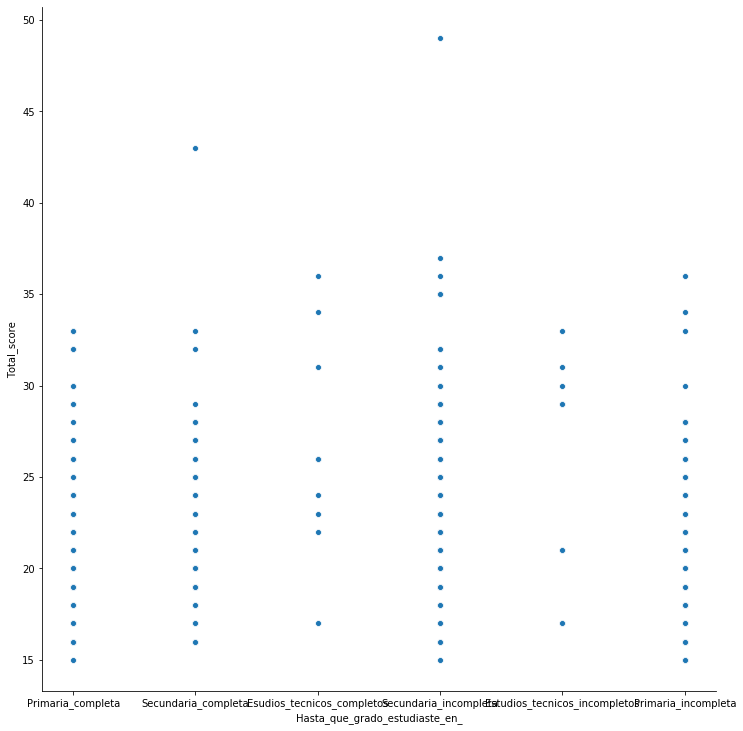

In [24]:
# change plot size
scatter1 = sns.pairplot(x_vars="Hasta_que_grado_estudiaste_en_", y_vars="Total_score", data=baseline2, height=10)


##### example table one

In [6]:

#which variables are we using?
columns = ['Hasta_que_grado_estudiaste_en_']

#declare categorical
categorical = ['Hasta_que_grado_estudiaste_en_']

#options
groupby = 'Programa_social.CunaMas - SAF'
#nonnormal = ['bili']

#runs tableone and stores in mytable
mytable = TableOne(baseline2, columns=columns, categorical=categorical,
                   groupby=groupby, pval=True)

#show stuff in screen
print(mytable.tabulate(tablefmt="github"))

#exports to excel file
#mytable.to_excel('mytable.xlsx')

|                                       |                               | Missing   | Overall    | 0.0       | 1.0       | P-Value   |
|---------------------------------------|-------------------------------|-----------|------------|-----------|-----------|-----------|
| n                                     |                               |           | 437        | 266       | 141       |           |
| Hasta_que_grado_estudiaste_en_, n (%) | Estudios_tecnicos_incompletos | 83        | 12 (3.4)   | 10 (4.7)  | 2 (1.4)   | 0.077     |
|                                       | Esudios_tecnicos_completos    |           | 9 (2.5)    | 6 (2.8)   | 3 (2.2)   |           |
|                                       | Primaria_completa             |           | 70 (19.8)  | 46 (21.4) | 24 (17.3) |           |
|                                       | Primaria_incompleta           |           | 69 (19.5)  | 38 (17.7) | 31 (22.3) |           |
|                                       | Secundaria_co

##### semopy example model

In [9]:
#mod = """ ECD ~ Knowledge + Health + CHA
#          ECD =~ z_COG + z_MOT
#          CHA =~ Cuantos_Visita_ACS_year
#          Knowledge =~ Total_score
#          Health =~ Tenia_Fiebre_o_tos1 + Tenia_Diarrea1 + Comorbilidades.Anemia + Comorbilidades.Malaria + Comorbilidades.Neumonia + Comorbilidades.Desnutricion.cronica
#          Knowledge ~ Household_wealth_tv.radio.teli.cementfloor
#          Health ~ Pregnancy + Sanitation
3          Pregnancy =~ Problemas_embarazo.Anemia
3          Sanitation =~ Clean_water_source + Toilet_sanitary
#      """
#code and add maternal education to knowledge

mod = """ ECD 



      """

model = Model(mod)

In [18]:
from pandas import read_csv
#data = read_csv("../data/baseline.csv",index_col=0)
#model.load_dataset(data)
model.load_dataset(baseline2)

from semopy import Optimizer
opt = Optimizer(model)
objective_function_value = opt.optimize()

from semopy import inspect
inspect(opt)

,lval,op,rval,Value,SE,Z-score,P-value
12,ECD,=~,z_MOT,1.173554,1.281370e-01,9.158586e+00,0.000000e+00
6,Health,=~,Comorbilidades.Anemia,1.423859,4.618444e-01,3.082985e+00,2.049358e-03
7,Health,=~,Comorbilidades.Desnutricion.cronica,0.388591,2.182849e-01,1.780203e+00,7.504280e-02
8,Health,=~,Comorbilidades.Malaria,0.021797,5.381127e-02,4.050563e-01,6.854361e-01
9,Health,=~,Comorbilidades.Neumonia,0.298022,1.357473e-01,2.195418e+00,2.813363e-02
10,Health,=~,Tenia_Diarrea1,2.197953,7.160171e-01,3.069694e+00,2.142782e-03
11,Sanitation,=~,Toilet_sanitary,0.402609,1.148173e-01,3.506517e+00,4.540126e-04
0,ECD,~,CHA,-0.007148,6.739067e-03,-1.060622e+00,2.888619e-01
1,ECD,~,Health,-1.995793,7.490179e-01,-2.664547e+00,7.709206e-03
2,ECD,~,Knowledge,0.033392,8.084166e-03,4.130529e+00,3.619301e-05


In [20]:
from semopy import gather_statistics 
#fit statistics
stats = gather_statistics(opt)
print(stats)

SEMStatistics(dof=69.0, ml=nan, fit_val=0.38059888293555844, chi2=(166.32171184283902, 5.206556297210341e-10), dof_baseline=91.0, chi2_baseline=846.8760390180437, rmsea=0.056877052174393074, cfi=0.8712464652679435, gfi=0.8036055996628624, agfi=0.7409870952075431, nfi=0.8036055996628624, tli=0.8301946136142443, aic=nan, bic=nan, params=[ParametersStatistics(value=-0.007147599642885226, se=0.006739066793455028, zscore=-1.0606215757894464, pvalue=0.2888619132502477), ParametersStatistics(value=-1.9957934711078096, se=0.7490178841960775, zscore=-2.6645471532995963, pvalue=0.007709205764796945), ParametersStatistics(value=0.03339187913247733, se=0.008084166154913877, zscore=4.130528552787091, pvalue=3.619301371049488e-05), ParametersStatistics(value=100.35586396850299, se=0.5648881250712197, zscore=177.6561756465897, pvalue=0.0), ParametersStatistics(value=-9.629944500094615, se=6.00491215800452, zscore=-1.6036778302004535, pvalue=0.10878508511877638), ParametersStatistics(value=0.507801836